# Comparacao de heuristicas para o problema da mochila binaria
#### Ariel T Leventhal

## Introducao

O problema da mochila binaria consiste em escolher um subconjunto de itens de um conjunto de itens, de forma a maximizar o valor total dos itens escolhidos, respeitando a restricao de que a soma dos pesos dos itens escolhidos nao ultrapasse um valor maximo predefinido.

O problema é computacionamente intesivo, sua versao exaustiva chega de morar diversos minutos para resolver os testes utilizados nesse trabalho. Por isso, é comum a utilizacao de heurísticas para resolver o problema. Pode se usar memoizacao para acelerara muito a versaso exaustiva. Para facilitar esse trabalho foi usado a versao com memoizacao para validar a eficacia do resultado das heurísticas aleatorias. Por isso não foi comparado o tempo de execucao das heurísticas com a versao exaustiva. Porem pode se ter como dado que a versao exaustiva sem memoização chegou e a demorar diversos minutos nos poucos teste que foram feitos com ela.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
idealValue1 = 601
idealValue2 = 870
idealValue3 = 3320
idealValue4 = 648
idealValues = [idealValue1, idealValue2, idealValue3, idealValue4]

### Heuristica 1: Aleatoria
A primeira heuristica consiste em reordenar aleatoriamente os itens e escolher os primeiros itens que couberem na mochila.


### Resultados:


In [20]:
randomValueSeries = []
for i in range(4):
	values = []
	with open("resultadosRandom"+str(i+1)+".txt") as f:
		for line in f:
			values.append(int(line.split()[1]))
		randomValueSeries.append(values)

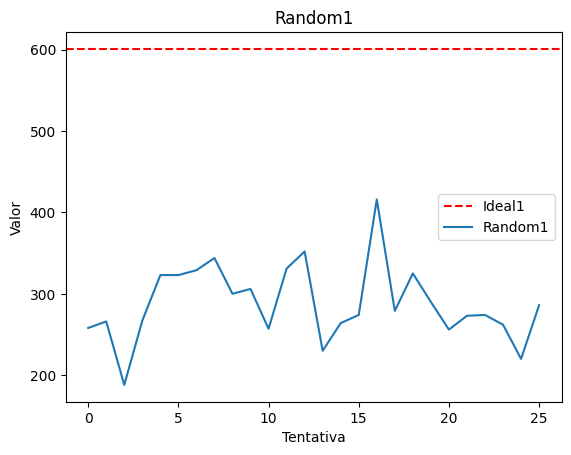

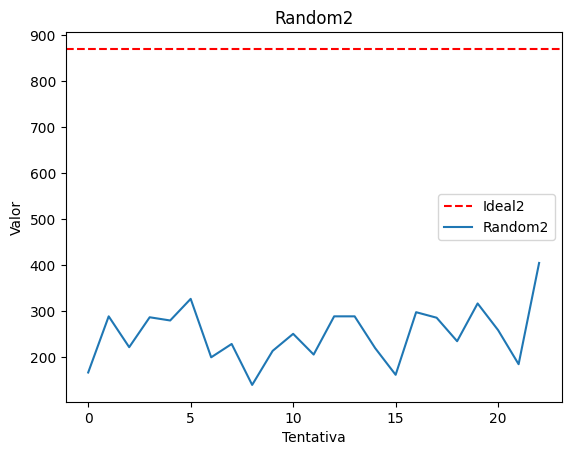

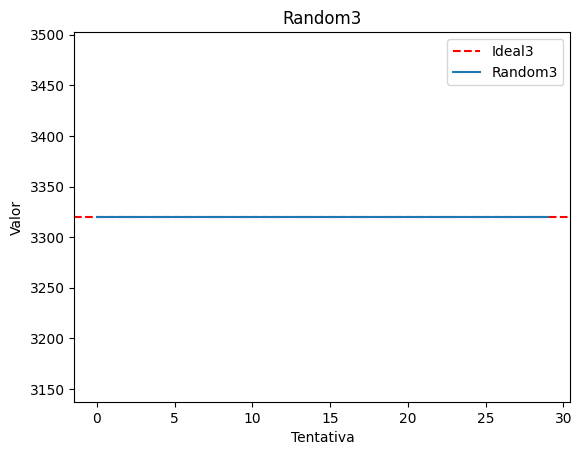

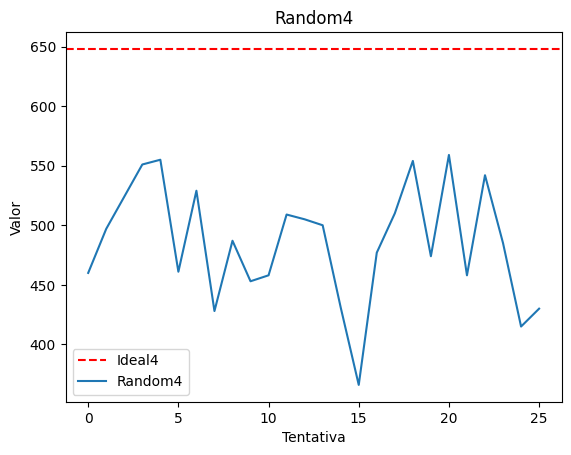

In [47]:
for i in range(4):
	plt.axhline(y = idealValues[i], color = 'r', linestyle = '--', label="Ideal"+str(i+1)) 
	plt.plot(randomValueSeries[i], label="Random"+str(i+1))
	plt.legend()
	plt.xlabel("Tentativa")
	plt.ylabel("Valor")
	plt.title("Random"+str(i+1))
	plt.show()

A heristica leva consistentemente menos de 1 milisegundo para resolver o problema, porem podemos ver que ela traz um resultado muito ruim, com um valor total de itens escolhidos muito baixo. 
Apenas a entrada 3 teve consistentemente um resultado perfeito, porem isso se deve ao fato de que a entrada 3 tem um peso maximo muito alto, e a heuristica aleatoria sempre escolhe os primeiros itens que couberem na mochila, e como a entrada 3 tem um peso maximo muito alto, ela sempre consegue escolher todos os itens.

Abaixo segue o erro medio e o maior e menor erro para cada entrada:

In [34]:
for i in range(4):
	print("--------------------------------")
	arr = np.array(randomValueSeries[i])
	print("Random Entrada "+str(i+1))
	print("")
	print("Valor Ideal: ", idealValues[i])
	print("Media: ", np.mean(arr))
	print("erro percentual: ", (idealValues[i]- np.mean(arr) ) / idealValues[i] * 100)
	print("Melhor: ", np.max(arr))
	print("Pior: ", np.min(arr))

print("--------------------------------")


--------------------------------
Random Entrada 1

Valor Ideal:  601
Media:  288.1923076923077
erro percentual:  52.04786893638808
Melhor:  416
Pior:  188
--------------------------------
Random Entrada 2

Valor Ideal:  870
Media:  250.30434782608697
erro percentual:  71.22938530734632
Melhor:  405
Pior:  140
--------------------------------
Random Entrada 3

Valor Ideal:  3320
Media:  3320.0
erro percentual:  0.0
Melhor:  3320
Pior:  3320
--------------------------------
Random Entrada 4

Valor Ideal:  648
Media:  485.3076923076923
erro percentual:  25.10683760683761
Melhor:  559
Pior:  366
--------------------------------


Podemos ver que o erro medio é muito alto, e mesmo a melhor solucao encontrada pela heuristica aleatoria é muito pior que a solucao otima.

### Heuristica 2: Probabilidade Aleatoria
A segunda heuristica consiste em atribuir uma probabilidade para cada item, e escolher os itens com probabilidade acima de um limiar determinado.




Assim como a heuristica aleatoria, a heuristica de probabilidade aleatoria leva consistentemente menos de 1 milisegundo para resolver o problema.

In [37]:
probValueSeries = []
for i in range(4):
	values = []
	with open("resultadosProb"+str(i+1)+".txt") as f:
		for line in f:
			values.append(int(line.split()[1]))
		probValueSeries.append(values)

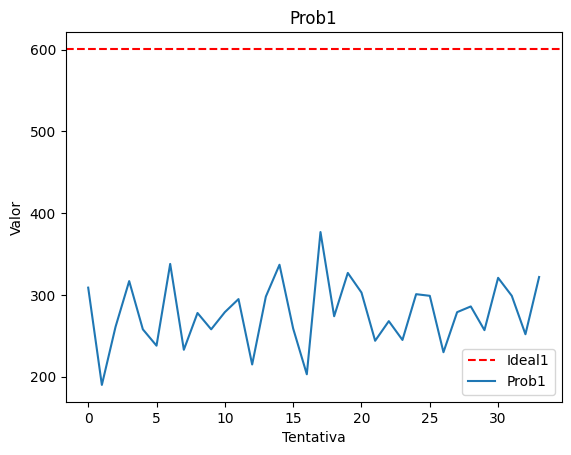

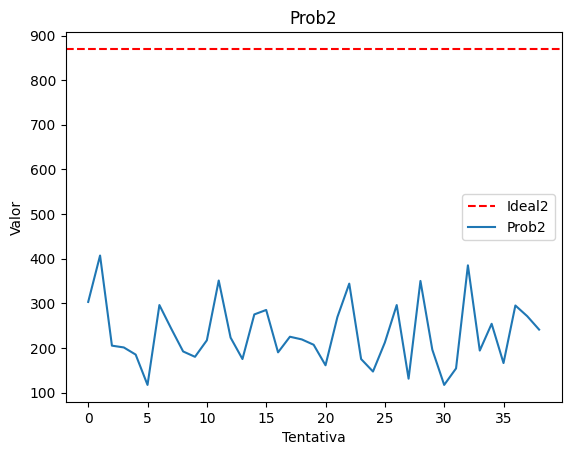

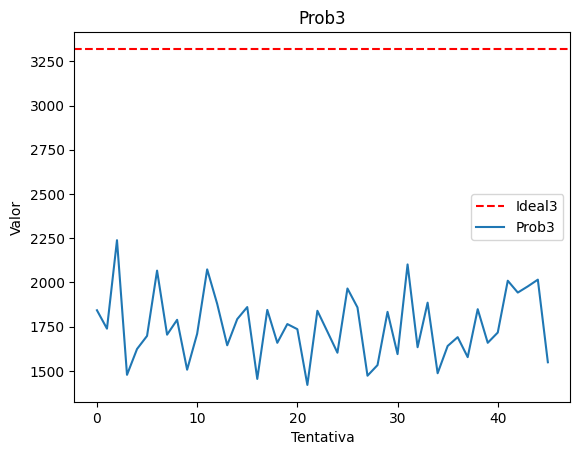

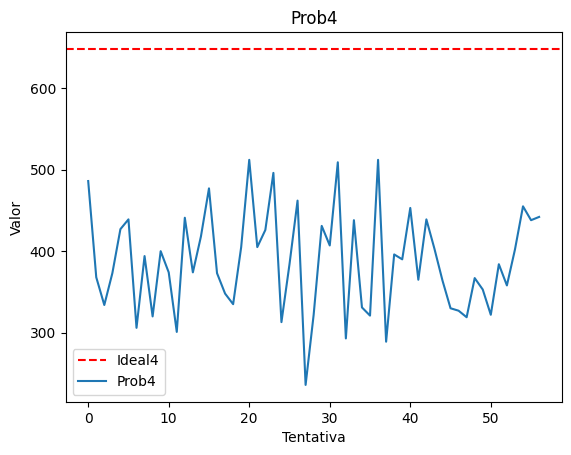

In [49]:
for i in range(4):
	plt.axhline(y = idealValues[i], color = 'r', linestyle = '--', label="Ideal"+str(i+1)) 
	plt.plot(probValueSeries[i], label="Prob"+str(i+1))
	plt.legend()
	plt.xlabel("Tentativa")
	plt.ylabel("Valor")
	plt.title("Prob"+str(i+1))
	plt.show()

In [40]:
for i in range(4):
	arr = np.array(probValueSeries[i])
	print("--------------------------------")
	print("Prob Entrada "+str(i+1))
	print("")
	print("Valor Ideal: ", idealValues[i])
	print("Media: ", np.mean(arr))
	print("erro percentual: ", (idealValues[i]- np.mean(arr) ) / idealValues[i] * 100)
	print("Melhor: ", np.max(arr))
	print("Pior: ", np.min(arr))
print("--------------------------------")


--------------------------------
Prob Entrada 1

Valor Ideal:  601
Media:  277.94117647058823
erro percentual:  53.7535480082216
Melhor:  377
Pior:  190
--------------------------------
Prob Entrada 2

Valor Ideal:  870
Media:  232.15384615384616
erro percentual:  73.315649867374
Melhor:  407
Pior:  117
--------------------------------
Prob Entrada 3

Valor Ideal:  3320
Media:  1754.2826086956522
erro percentual:  47.16016238868517
Melhor:  2239
Pior:  1421
--------------------------------
Prob Entrada 4

Valor Ideal:  648
Media:  387.49122807017545
erro percentual:  40.201970976824775
Melhor:  512
Pior:  236
--------------------------------


In [45]:
print("comparando prob e random")
for i in range(4):
	print("--------------------------------")
	print("Random "+str(i+1)+ " / Prob "+str(i+1))
	print("Media: ", np.mean(randomValueSeries[i]), " / ", np.mean(probValueSeries[i]))
	print("Melhor: ", np.max(randomValueSeries[i]), " / ", np.max(probValueSeries[i]))
	print("Pior: ", np.min(randomValueSeries[i]), " / ", np.min(probValueSeries[i]))
	

comparando prob e random
--------------------------------
Random 1 / Prob 1
Media:  288.1923076923077  /  277.94117647058823
Melhor:  416  /  377
Pior:  188  /  190
--------------------------------
Random 2 / Prob 2
Media:  250.30434782608697  /  232.15384615384616
Melhor:  405  /  407
Pior:  140  /  117
--------------------------------
Random 3 / Prob 3
Media:  3320.0  /  1754.2826086956522
Melhor:  3320  /  2239
Pior:  3320  /  1421
--------------------------------
Random 4 / Prob 4
Media:  485.3076923076923  /  387.49122807017545
Melhor:  559  /  512
Pior:  366  /  236


Podemos ver que a heuristica de probabilidade aleatoria (com limiar de 0.5) é quase sempre pior que a heuristica aleatoria. Isso ocorre pois as vezes muitos itens ficam com probabilidade baixa e a mochila acaba nao sendo preenchida. Isso fica principalmente evidente na entrada 3, onde a heuristica aleatoria sempre consegue escolher todos os itens, enquanto a heuristica de probabilidade aleatoria nao. 

Isso poderia ser mitigado diminuindo o limiar, porem isso quanto menor o limiar, mais semelhante a heuristica de probabilidade aleatoria fica da heuristica aleatoria, e a heuristica aleatoria é mais rapida.


Um possivel teste interessante seria ao invez de escolher uma probabilidade aleatoria, escolher uma probabilidade baseada na razao entre o valor e o peso do item, porem isso nao foi feito nesse trabalho.